# Check Environment

In [1]:
import torch, torchvision
print('Pytorch 版本', torch.__version__)
print('CUDA 是否可用',torch.cuda.is_available())

Pytorch 版本 2.0.1+cu117
CUDA 是否可用 True


In [2]:
import mmcv
from mmcv.ops import get_compiling_cuda_version, get_compiler_version
print('MMCV版本', mmcv.__version__)
print('CUDA版本', get_compiling_cuda_version())
print('编译器版本', get_compiler_version())

MMCV版本 2.0.0
CUDA版本 11.7
编译器版本 GCC 9.3


In [3]:
import mmseg
from mmseg.utils import register_all_modules
from mmseg.apis import inference_model, init_model
print('mmsegmentation版本', mmseg.__version__)

mmsegmentation版本 1.0.0


In [8]:
!wget https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf -O ~/anaconda3/envs/mmlab/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf
# !rm -rf /home/featurize/.cache/matplotlib

--2023-06-18 15:05:15--  https://zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com/20220716-mmclassification/dataset/SimHei.ttf
Resolving zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)... 121.36.235.132
Connecting to zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com (zihao-openmmlab.obs.cn-east-3.myhuaweicloud.com)|121.36.235.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10050868 (9.6M) [application/x-font-ttf]
Saving to: ‘/home/elsa/anaconda3/envs/mmlab/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’

/home/elsa/anaconda 100%[===================>]   9.58M  2.00MB/s    in 5.0s    

2023-06-18 15:05:21 (1.91 MB/s) - ‘/home/elsa/anaconda3/envs/mmlab/lib/python3.8/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf’ saved [10050868/10050868]



In [1]:
import matplotlib 
import matplotlib.pyplot as plt
matplotlib.rc("font",family='SimHei') # 中文字体

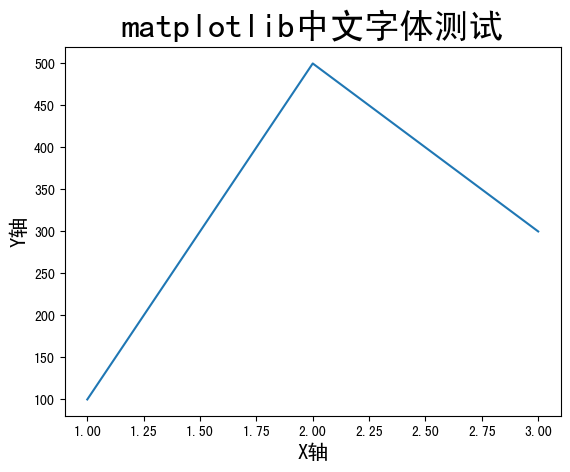

In [2]:
plt.plot([1,2,3], [100,500,300])
plt.title('matplotlib中文字体测试', fontsize=25)
plt.xlabel('X轴', fontsize=15)
plt.ylabel('Y轴', fontsize=15)
plt.show()

# Data Explore

In [3]:
!mv Watermelon87_Semantic_Seg_Mask/img_dir/train/21746.1.jpg Watermelon87_Semantic_Seg_Mask/img_dir/train/21746.jpg 

In [4]:
!mv Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg@1280w_1l_2o_100sh.jpg Watermelon87_Semantic_Seg_Mask/img_dir/val/01bd15599c606aa801201794e1fa30.jpg

In [5]:
import os

import cv2
import numpy as np
from PIL import Image
from tqdm import tqdm

import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
img_path = 'Watermelon87_Semantic_Seg_Mask/img_dir/train/1471253631_2.jpg'
mask_path = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train/1471253631_2.png'

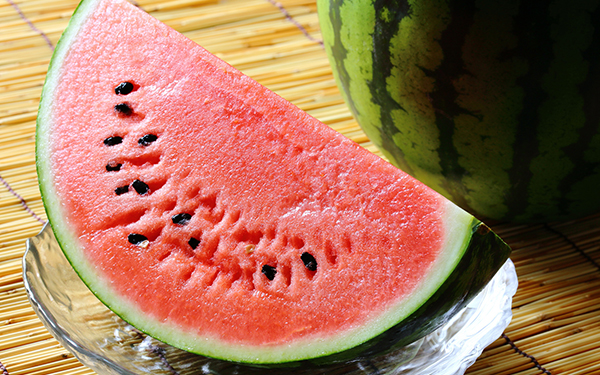

In [9]:
Image.open(img_path)

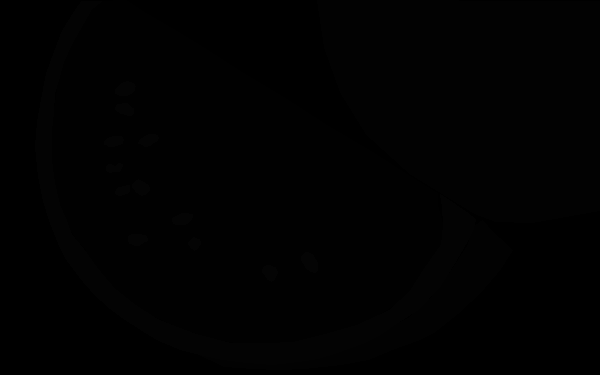

In [12]:
Image.open(mask_path)

In [18]:
img = cv2.imread(img_path)
mask = cv2.imread(mask_path)
mask.shape

(375, 600, 3)

In [14]:
np.unique(mask)

array([0, 1, 2, 3, 4], dtype=uint8)

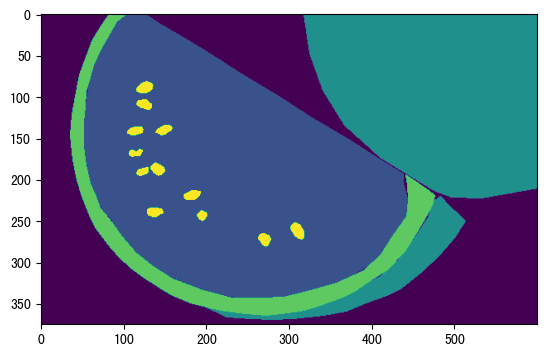

In [16]:
plt.imshow(mask[:,:,2])
plt.show()

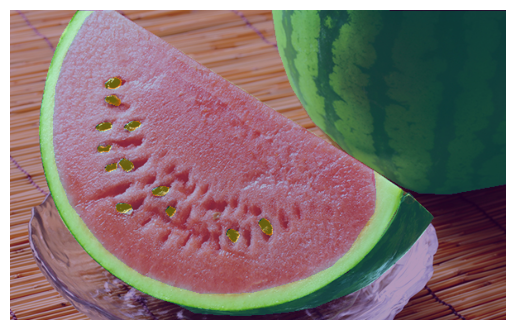

In [21]:
plt.imshow(img[:,:,::-1])
plt.imshow(mask[:,:,0], alpha=0.4) # alpha 高亮区域透明度，越小越接近原图
plt.axis('off')
plt.show()

In [22]:
# 指定图像和标注路径
PATH_IMAGE = 'Watermelon87_Semantic_Seg_Mask/img_dir/train/'
PATH_MASKS = 'Watermelon87_Semantic_Seg_Mask/ann_dir/train/'

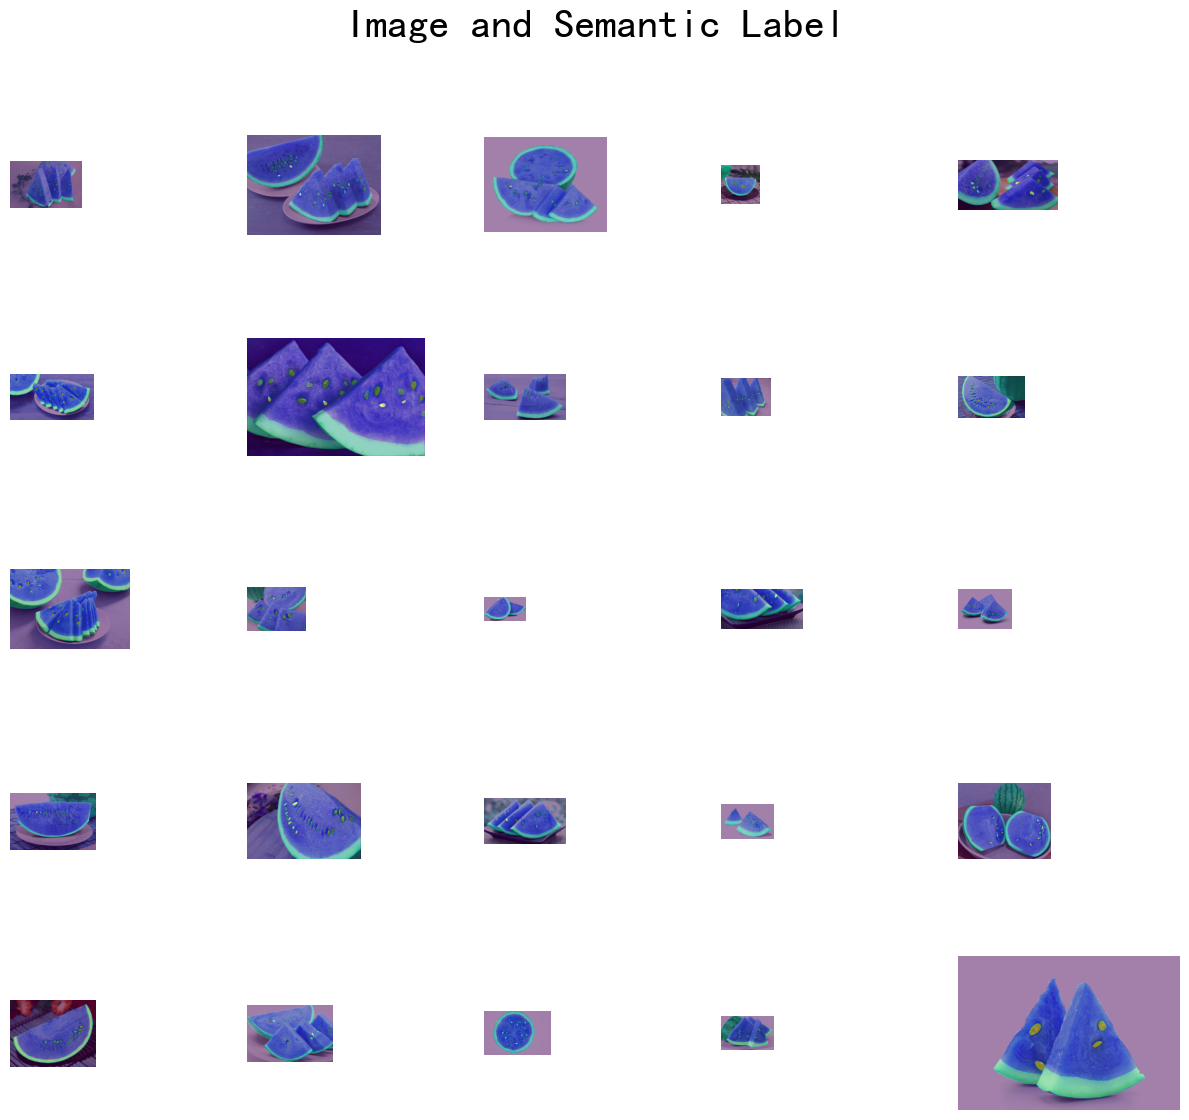

In [23]:
# n行n列可视化
n = 5

# 标注区域透明度
opacity = 0.5

fig, axes = plt.subplots(nrows=n, ncols=n, sharex=True, figsize=(12,12))

for i, file_name in enumerate(os.listdir(PATH_IMAGE)[:n**2]):
    
    # 载入图像和标注
    img_path = os.path.join(PATH_IMAGE, file_name)
    mask_path = os.path.join(PATH_MASKS, file_name.split('.')[0]+'.png')
    img = cv2.imread(img_path)
    mask = cv2.imread(mask_path)
    
    # 可视化
    axes[i//n, i%n].imshow(img)
    axes[i//n, i%n].imshow(mask[:,:,0], alpha=opacity)
    axes[i//n, i%n].axis('off') # 关闭坐标轴显示
fig.suptitle('Image and Semantic Label', fontsize=30)
plt.tight_layout()
plt.show()